#Fase de entrenamiento del modelo de predicción

In [ ]:
# ===========================================
# 1. Importación de librerías
# ===========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cargar el dataset procesado
df_datasetFinal = pd.read_csv('/content/drive/MyDrive/Business Predictive Analytics/Carpeta sin título/airline_satisfaction_transformed_clean.csv', encoding="utf-8")# /content/airline_satisfaction_transformed_clean.csv
display(df_datasetFinal.head())

,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase,Distancia_Vuelo,Wifi_a_bordo,Comodidad_Horario,Facilidad_Reserva,Ubicacion_Puerta,...,TypeOfTravel_bin,Class_Eco,Class_Eco Plus,Service_Mean,Service_Min,Service_Max,Service_Var,Age_Bin,Distance_Bin,target
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,0,False,True,3.857143,1,5,1.362637,0.0,1.0,0
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,...,1,False,False,2.285714,1,5,1.758242,1.0,0.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,1,False,False,3.714286,2,5,1.604396,1.0,2.0,1
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,1,False,False,3.000000,1,5,2.153846,1.0,1.0,0
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,...,1,False,False,3.500000,3,5,0.576923,4.0,0.0,1


In [ ]:
df_datasetFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Genero             103904 non-null  object 
 1   Tipo_Cliente       103904 non-null  object 
 2   Edad               103904 non-null  int64  
 3   Tipo_Viaje         103904 non-null  object 
 4   Clase              103904 non-null  object 
 5   Distancia_Vuelo    103904 non-null  float64
 6   Wifi_a_bordo       103904 non-null  int64  
 7   Comodidad_Horario  103904 non-null  int64  
 8   Facilidad_Reserva  103904 non-null  int64  
 9   Ubicacion_Puerta   103904 non-null  int64  
 10  Comida_Bebida      103904 non-null  int64  
 11  Embarque_Online    103904 non-null  int64  
 12  Comodidad_Asiento  103904 non-null  int64  
 13  Entretenimiento    103904 non-null  int64  
 14  Servicio_a_bordo   103904 non-null  int64  
 15  Espacio_Piernas    103904 non-null  int64  
 16  Ma

In [ ]:
columns_to_drop_from_final = [
    'Genero', 'Tipo_Cliente', 'Tipo_Viaje', 'Clase', 'Satisfaccion', 'Satisfaccion_bin'
]

df_datasetFinal_cleaned = df_datasetFinal.drop(columns=columns_to_drop_from_final, errors='ignore')

# Guardar el DataFrame limpio de nuevo al CSV
output_path_cleaned = 'airline_satisfaction_transformed_clean.csv'
df_datasetFinal_cleaned.to_csv(output_path_cleaned, index=False)

print(f"Columnas eliminadas: {columns_to_drop_from_final}")
print(f"DataFrame limpio guardado en: {output_path_cleaned}")

# Actualizar df_datasetFinal para usar la versión limpia en pasos futuros
df_datasetFinal = df_datasetFinal_cleaned

# Mostrar las primeras filas y la información para confirmar los cambios
display(df_datasetFinal.head())
df_datasetFinal.info()

Columnas eliminadas: ['Genero', 'Tipo_Cliente', 'Tipo_Viaje', 'Clase', 'Satisfaccion', 'Satisfaccion_bin']
DataFrame limpio guardado en: airline_satisfaction_transformed_clean.csv


,Edad,Distancia_Vuelo,Wifi_a_bordo,Comodidad_Horario,Facilidad_Reserva,Ubicacion_Puerta,Comida_Bebida,Embarque_Online,Comodidad_Asiento,Entretenimiento,...,TypeOfTravel_bin,Class_Eco,Class_Eco Plus,Service_Mean,Service_Min,Service_Max,Service_Var,Age_Bin,Distance_Bin,target
0,13,460.0,3,4,3,1,5,3,5,5,...,0,False,True,3.857143,1,5,1.362637,0.0,1.0,0
1,25,235.0,3,2,3,3,1,3,1,1,...,1,False,False,2.285714,1,5,1.758242,1.0,0.0,0
2,26,1142.0,2,2,2,2,5,5,5,5,...,1,False,False,3.714286,2,5,1.604396,1.0,2.0,1
3,25,562.0,2,5,5,5,2,2,2,2,...,1,False,False,3.000000,1,5,2.153846,1.0,1.0,0
4,61,214.0,3,3,3,3,4,5,5,3,...,1,False,False,3.500000,3,5,0.576923,4.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Edad               103904 non-null  int64  
 1   Distancia_Vuelo    103904 non-null  float64
 2   Wifi_a_bordo       103904 non-null  int64  
 3   Comodidad_Horario  103904 non-null  int64  
 4   Facilidad_Reserva  103904 non-null  int64  
 5   Ubicacion_Puerta   103904 non-null  int64  
 6   Comida_Bebida      103904 non-null  int64  
 7   Embarque_Online    103904 non-null  int64  
 8   Comodidad_Asiento  103904 non-null  int64  
 9   Entretenimiento    103904 non-null  int64  
 10  Servicio_a_bordo   103904 non-null  int64  
 11  Espacio_Piernas    103904 non-null  int64  
 12  Manejo_Equipaje    103904 non-null  int64  
 13  Servicio_Check-in  103904 non-null  int64  
 14  Servicio_Vuelo     103904 non-null  int64  
 15  Limpieza           103904 non-null  int64  
 16  Ge

RFECV

## Separar variables predictoras y target

In [ ]:
# Separar X e y
X = df_datasetFinal.drop(columns=['target'])
y = df_datasetFinal['target']



#  División 60% / 20% / 20%

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.6, stratify=y, random_state=42
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test:", X_test.shape)

Train: (62342, 27)
Valid: (20781, 27)
Test: (20781, 27)


## Feature Selection - Técnica de Recursive Feature Elimination (RFECV)


In [ ]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
# Feature Selection - Técnica de Recursive Feature Elimination (RFECV)

# Crear conjunto Train+Valid
X_trainval = pd.concat([X_train, X_valid])
y_trainval = pd.concat([y_train, y_valid])


In [ ]:

# Feature selection
recFE = RFECV(
              estimator = RandomForestClassifier(n_estimators=20, n_jobs=-1),
              cv        = 5,
              scoring   = 'roc_auc',
              min_features_to_select=1
             )

recFE.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1),
      scoring='roc_auc')

In [ ]:
# Tabla de Ranking
ranking_df = pd.DataFrame({
    'feature': X_train.columns,
    'selected': recFE.support_,
    'ranking': recFE.ranking_
})

ranking_df.sort_values(by='ranking', inplace=True)
ranking_df.reset_index(drop=True, inplace=True)
ranking_df.index += 1
ranking_df.index.name = 'N°'

print("Ranking de características seleccionadas por RFECV:")
print(ranking_df)



Ranking de características seleccionadas por RFECV:
              feature  selected  ranking
N°                                      
1                Edad      True        1
2     Distancia_Vuelo      True        1
3        Wifi_a_bordo      True        1
4   Comodidad_Horario      True        1
5   Facilidad_Reserva      True        1
6    Ubicacion_Puerta      True        1
7       Comida_Bebida      True        1
8     Embarque_Online      True        1
9   Comodidad_Asiento      True        1
10    Entretenimiento      True        1
11   Servicio_a_bordo      True        1
12    Espacio_Piernas      True        1
13    Manejo_Equipaje      True        1
14  Servicio_Check-in      True        1
15     Servicio_Vuelo      True        1
16           Limpieza      True        1
17         Gender_bin      True        1
18   CustomerType_bin      True        1
19   TypeOfTravel_bin      True        1
20          Class_Eco      True        1
21     Class_Eco Plus      True        1
22   

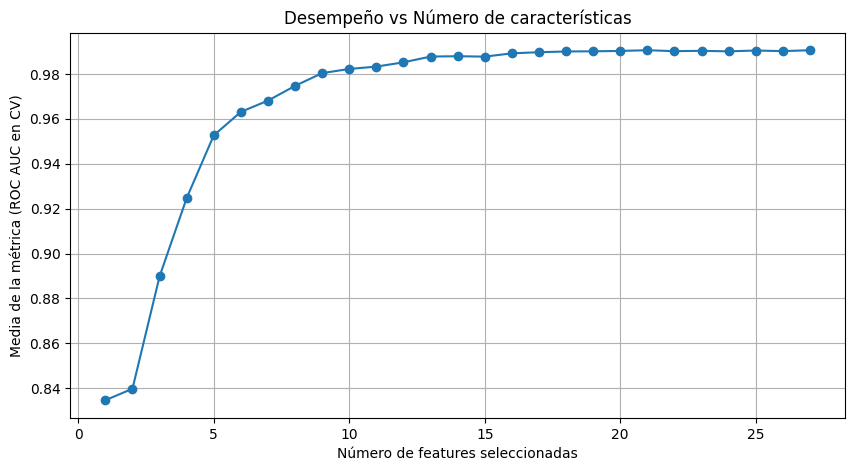

In [ ]:

# Evaluar el rendimiento con diferentes features en el proceso.
plt.figure(figsize=(10,5))
plt.plot(
    range(1, len(recFE.cv_results_['mean_test_score']) + 1),
    recFE.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("Número de features seleccionadas")
plt.ylabel("Media de la métrica (ROC AUC en CV)")
plt.title("Desempeño vs Número de características")
plt.grid(True)
plt.show()



In [ ]:
# Estas son los features que el algoritmo seleccionó
selected_features = X_train.columns[recFE.support_]
print("Features seleccionadas por RFECV:")
print(selected_features)

Features seleccionadas por RFECV:
Index(['Edad', 'Distancia_Vuelo', 'Wifi_a_bordo', 'Comodidad_Horario',
       'Facilidad_Reserva', 'Ubicacion_Puerta', 'Comida_Bebida',
       'Embarque_Online', 'Comodidad_Asiento', 'Entretenimiento',
       'Servicio_a_bordo', 'Espacio_Piernas', 'Manejo_Equipaje',
       'Servicio_Check-in', 'Servicio_Vuelo', 'Limpieza', 'Gender_bin',
       'CustomerType_bin', 'TypeOfTravel_bin', 'Class_Eco', 'Class_Eco Plus',
       'Service_Mean', 'Service_Min', 'Service_Max', 'Service_Var', 'Age_Bin',
       'Distance_Bin'],
      dtype='object')


In [ ]:
# Aplica la transformación de los features seleccionados a los datasets
X_train_fs    = recFE.transform(X_train)
X_valid_fs    = recFE.transform(X_valid)
X_trainval_fs = recFE.transform(X_trainval)
X_test_fs     = recFE.transform(X_test)



In [ ]:
# Obtener los nombres de las columnas seleccionadas
selected_features = X_train.columns[recFE.support_]

# Crear nuevos DataFrames con columnas correctamente etiquetadas
X_train_fs_df    = pd.DataFrame(X_train_fs,    columns=selected_features, index=X_train.index)
X_valid_fs_df    = pd.DataFrame(X_valid_fs,    columns=selected_features, index=X_valid.index)
X_trainval_fs_df = pd.DataFrame(X_trainval_fs, columns=selected_features, index=X_trainval.index)
X_test_fs_df     = pd.DataFrame(X_test_fs,     columns=selected_features, index=X_test.index)

# Reemplazar los datasets originales por las versiones con features seleccionadas
X_train    = X_train_fs_df
X_valid    = X_valid_fs_df
X_trainval = X_trainval_fs_df
X_test     = X_test_fs_df

print("Nuevas formas de los conjuntos tras feature selection:")
print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test:", X_test.shape)

Nuevas formas de los conjuntos tras feature selection:
Train: (62342, 27)
Valid: (20781, 27)
Test: (20781, 27)


## Función para métricas

In [ ]:
def get_model_metrics(model, X_train, y_train, X_valid, y_valid):
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_valid_proba = model.predict_proba(X_valid)[:, 1]

    auc_train = roc_auc_score(y_train, y_train_proba)
    acc_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    auc_valid = roc_auc_score(y_valid, y_valid_proba)
    acc_valid = accuracy_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)

    return auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid

def get_cv_metrics(model, X, y, cv=5, scoring='f1'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    return cv_scores.mean(), cv_scores.std()


all_metrics = []

##Modelo de regresión logistica

### Modelo base

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
log_reg_base = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_base.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(log_reg_base, X_train, y_train, X_valid, y_valid)
all_metrics.append({
    'Modelo': 'Regresión Logística (Base)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': None,  # Not calculated for base model
    'CV Std (F1)': None
})


In [ ]:
metrics_df = pd.DataFrame(all_metrics)
metrics_df = metrics_df.round(4) # Round to 4 decimal places for readability
metrics_df

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9456,0.9446,0.8944,0.891,0.8753,0.8715,None,None


### Modelo hiperparametrizado

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

log_reg_tuned = GridSearchCV(
    LogisticRegression(max_iter=100, random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [ ]:
log_reg_tuned.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1')

In [ ]:

best_model = log_reg_tuned.best_estimator_
best_params = log_reg_tuned.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(best_model, X_train, y_train, X_valid, y_valid)
cv_mean_f1_lr, cv_std_f1_lr = get_cv_metrics(best_model, X_train, y_train)
all_metrics.append({
    'Modelo': 'Regresión Logística (Hiperparametrizado)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': cv_mean_f1_lr,
    'CV Std (F1)': cv_std_f1_lr
})

df_metrics = pd.DataFrame(all_metrics)
df_metrics = df_metrics.round(4)
df_metrics

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9448,0.944,0.8942,0.8909,0.8750,0.8714,NaN,NaN
1,Regresión Logística (Hiperparametrizado),0.9448,0.944,0.8942,0.8907,0.8749,0.8713,0.8748,0.002


####*Estabilidad del modelo*

In [ ]:
cv_scores = cross_val_score(
    best_model, X_train, y_train, cv=5, scoring='f1'
)

print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())

CV Mean: 0.8747520581355017
CV Std: 0.0019552844641244154


##Arboles de decisión

### Modelo base

In [ ]:
# Modelo base
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(dt_base, X_train, y_train, X_valid, y_valid)
all_metrics.append({
    'Modelo': 'Árbol de Decisión (Base)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': None,
    'CV Std (F1)': None
})

In [ ]:
df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)
df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9448,0.944,0.8942,0.8909,0.8750,0.8714,NaN,NaN
1,Regresión Logística (Hiperparametrizado),0.9448,0.944,0.8942,0.8907,0.8749,0.8713,0.8748,0.002
2,Árbol de Decisión (Base),1.0000,0.940,1.0000,0.9409,1.0000,0.9319,NaN,NaN


###Modelo hiperparametrizado

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

dt_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
dt_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [ ]:
print("Mejores hiperparámetros:", dt_tuned.best_params_)

best_dt = dt_tuned.best_estimator_

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(best_dt, X_train, y_train, X_valid, y_valid)
cv_mean_f1_dt, cv_std_f1_dt = get_cv_metrics(best_dt, X_train, y_train)
all_metrics.append({
    'Modelo': 'Árbol de Decisión (Hiperparametrizado)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': cv_mean_f1_dt,
    'CV Std (F1)': cv_std_f1_dt
})
df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)
df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9448,0.9440,0.8942,0.8909,0.8750,0.8714,NaN,NaN
1,Regresión Logística (Hiperparametrizado),0.9448,0.9440,0.8942,0.8907,0.8749,0.8713,0.8748,0.0020
2,Árbol de Decisión (Base),1.0000,0.9400,1.0000,0.9409,1.0000,0.9319,NaN,NaN
3,Árbol de Decisión (Hiperparametrizado),0.9984,0.9731,0.9754,0.9488,0.9714,0.9404,0.9412,0.0038


####*Estabilidad del modelo*

In [ ]:
#evaluar estabilidad del mmodelo
cv_scores = cross_val_score(
    best_dt, X_train, y_train, cv=5, scoring='f1'
)
print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())

CV Mean: 0.9411861049019776
CV Std: 0.003826617544119912


## Ramdon forest

###Modelo base

In [ ]:
# Modelo base
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Entrenar
rf_base.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(rf_base, X_train, y_train, X_valid, y_valid)
all_metrics.append({
    'Modelo': 'Random Forest (Base)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': None,
    'CV Std (F1)': None
})

df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)
df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9448,0.9440,0.8942,0.8909,0.8750,0.8714,NaN,NaN
1,Regresión Logística (Hiperparametrizado),0.9448,0.9440,0.8942,0.8907,0.8749,0.8713,0.8748,0.0020
2,Árbol de Decisión (Base),1.0000,0.9400,1.0000,0.9409,1.0000,0.9319,NaN,NaN
3,Árbol de Decisión (Hiperparametrizado),0.9984,0.9731,0.9754,0.9488,0.9714,0.9404,0.9412,0.0038
4,Random Forest (Base),1.0000,0.9924,1.0000,0.9579,1.0000,0.9507,NaN,NaN


###Modelo hiperparametrizado

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [ ]:
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1', verbose=1)

In [ ]:
print("Mejores hiperparámetros:", rf_tuned.best_params_)

best_rf = rf_tuned.best_estimator_

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(best_rf, X_train, y_train, X_valid, y_valid)
cv_mean_f1_rf, cv_std_f1_rf = get_cv_metrics(best_rf, X_train, y_train)
all_metrics.append({
    'Modelo': 'Random Forest (Hiperparametrizado)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': cv_mean_f1_rf,
    'CV Std (F1)': cv_std_f1_rf
})

df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)
df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9448,0.9440,0.8942,0.8909,0.8750,0.8714,NaN,NaN
1,Regresión Logística (Hiperparametrizado),0.9448,0.9440,0.8942,0.8907,0.8749,0.8713,0.8748,0.0020
2,Árbol de Decisión (Base),1.0000,0.9400,1.0000,0.9409,1.0000,0.9319,NaN,NaN
3,Árbol de Decisión (Hiperparametrizado),0.9984,0.9731,0.9754,0.9488,0.9714,0.9404,0.9412,0.0038
4,Random Forest (Base),1.0000,0.9924,1.0000,0.9579,1.0000,0.9507,NaN,NaN
5,Random Forest (Hiperparametrizado),1.0000,0.9928,1.0000,0.9591,0.9999,0.9521,0.9530,0.0023


####*Estabilidad del modelo*

In [ ]:
#Evaluar estabilidad del modelo
cv_scores = cross_val_score(
    best_rf, X_train, y_train, cv=5, scoring='f1'
)

print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())

CV Mean: 0.9529719530458699
CV Std: 0.002237074891449522


##XGBoost

### Modelo base

In [ ]:
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",  # rápido
    random_state=42,
    n_jobs=-1
)

xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(xgb_base, X_train, y_train, X_valid, y_valid)
all_metrics.append({
    'Modelo': 'XGBoost (Base)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': None,
    'CV Std (F1)': None
})

df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)
df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9456,0.9446,0.8944,0.8910,0.8753,0.8715,None,None
1,XGBoost (Base),0.9984,0.9941,0.9781,0.9604,0.9744,0.9537,None,None


### Modelo hiperparametrizado

In [ ]:
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "model__n_estimators": [150, 200, 250],
    "model__learning_rate": [0.03, 0.05, 0.07],

    # complejidad del árbol
    "model__max_depth": [3, 4, 5],
    "model__min_child_weight": [1, 3, 5],

    # regularización moderada
    "model__gamma": [0, 0.1, 0.2],
    "model__reg_alpha": [0, 0.2, 0.5],
    "model__reg_lambda": [1.0, 2.0],

    # muestreo
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_tuned = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist ,
    n_iter=25,
    scoring="f1",   # métrica principal
    cv=5,                # validación cruzada de 5 folds
    n_jobs=-1,
    verbose=2,
    random_state=42
)



In [ ]:
#entrenar
xgb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__reg_lambda", "model__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2],
                                        'model__learning_rate': [0.03, 0.05,
                                                                 0.07],
                                        'model__max_depth': [3, 4, 5],
                                        'model__min_child_weight': [1, 3, 5],
                                        'model__n_estimators': [150, 200, 250],
                                        'model__reg_alpha': [0, 0.2, 0.5],
                                        'model__reg_lambda': [1.0, 2.0],
                                        'model__subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
best_params = xgb_tuned.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'model__subsample': 0.8, 'model__reg_lambda': 2.0, 'model__reg_alpha': 0.5, 'model__n_estimators': 200, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.07, 'model__gamma': 0.1, 'model__colsample_bytree': 0.8}


In [ ]:
best_xgb = xgb_tuned.best_estimator_
auc_train, auc_valid, acc_train, acc_valid, f1_train, f1_valid = get_model_metrics(best_xgb, X_train, y_train, X_valid, y_valid)
cv_mean_f1_xgb, cv_std_f1_xgb = get_cv_metrics(best_xgb, X_train, y_train)
all_metrics.append({
    'Modelo': 'XGBoost (Hiperparametrizado)',
    'AUC (Train)': auc_train,
    'AUC (Valid)': auc_valid,
    'Accuracy (Train)': acc_train,
    'Accuracy (Valid)': acc_valid,
    'F1 (Train)': f1_train,
    'F1 (Valid)': f1_valid,
    'CV Mean (F1)': cv_mean_f1_xgb,
    'CV Std (F1)': cv_std_f1_xgb
})

df_metricas = pd.DataFrame(all_metrics)
df_metricas = df_metricas.round(4)

df_metricas

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9456,0.9446,0.8944,0.8910,0.8753,0.8715,NaN,NaN
1,XGBoost (Base),0.9984,0.9941,0.9781,0.9604,0.9744,0.9537,NaN,NaN
2,XGBoost (Hiperparametrizado),0.9984,0.9941,0.9781,0.9604,0.9744,0.9537,0.9539,0.0021


## Metricas y evaluación Final

In [ ]:
metrics_df = pd.DataFrame(all_metrics)
metrics_df = metrics_df.round(4) # Round to 4 decimal places for readability
metrics_df

,Modelo,AUC (Train),AUC (Valid),Accuracy (Train),Accuracy (Valid),F1 (Train),F1 (Valid),CV Mean (F1),CV Std (F1)
0,Regresión Logística (Base),0.9456,0.9446,0.8944,0.8910,0.8753,0.8715,NaN,NaN
1,XGBoost (Base),0.9984,0.9941,0.9781,0.9604,0.9744,0.9537,NaN,NaN
2,XGBoost (Hiperparametrizado),0.9984,0.9941,0.9781,0.9604,0.9744,0.9537,0.9539,0.0021


## Entrenemiento final con el mejor modelo

### Metricas y comunicación

In [ ]:
X_train_final = pd.concat([X_train, X_valid], ignore_index=True)
y_train_final = pd.concat([y_train, y_valid], ignore_index=True)

print(f"Shape of combined training features (X_train_final): {X_train_final.shape}")
print(f"Shape of combined training labels (y_train_final): {y_train_final.shape}")

Shape of combined training features (X_train_final): (83123, 27)
Shape of combined training labels (y_train_final): (83123,)


In [ ]:
print("Retraining the best model (XGBoost Hiperparametrizado) on the combined training and validation data...")
best_xgb.fit(X_train_final, y_train_final)
print("Model retraining complete.")

Retraining the best model (XGBoost Hiperparametrizado) on the combined training and validation data...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__reg_lambda", "model__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model retraining complete.


In [ ]:
#predicciones
y_pred_train = best_xgb.predict(X_train_final)
y_proba_train = best_xgb.predict_proba(X_train_final)[:, 1]

#metricas
accuracy_train = accuracy_score(y_train_final, y_pred_train)
precision_train = precision_score(y_train_final, y_pred_train)
recall_train = recall_score(y_train_final, y_pred_train)
auc_train = roc_auc_score(y_train_final, y_proba_train)
acc_train = accuracy_score(y_train_final, y_pred_train)
print("Evaluación en train /n")
print(f"Accuracy (Train): {accuracy_train:.4f}")
print(f"Precision (Train): {precision_train:.4f}")
print(f"Recall (Train): {recall_train:.4f}")
print(f"AUC (Train): {auc_train:.4f}")
print(f"Accuracy (Train): {acc_train:.4f}")
print("\n--- Final Model Evaluation on Validation Set ---")
print(classification_report(y_train_final, y_pred_train))

Evaluación en train /n
Accuracy (Train): 0.9756
Precision (Train): 0.9843
Recall (Train): 0.9590
AUC (Train): 0.9980
Accuracy (Train): 0.9756

--- Final Model Evaluation on Validation Set ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47103
           1       0.98      0.96      0.97     36020

    accuracy                           0.98     83123
   macro avg       0.98      0.97      0.98     83123
weighted avg       0.98      0.98      0.98     83123



In [ ]:
y_pred_test = best_xgb.predict(X_test)
y_proba_test = best_xgb.predict_proba(X_test)[:, 1]

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_proba_test)

# Print the evaluation metrics
print("\n--- Final Model Evaluation on Test Set ---")
print(f"Accuracy (Test): {accuracy_test:.4f}")
print(f"Precision (Test): {precision_test:.4f}")
print(f"Recall (Test): {recall_test:.4f}")
print(f"F1-Score (Test): {f1_test:.4f}")
print(f"AUC (Test): {auc_test:.4f}")

# Optionally, display a classification report for more detailed metrics
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))
print


--- Final Model Evaluation on Test Set ---
Accuracy (Test): 0.9616
Precision (Test): 0.9706
Recall (Test): 0.9397
F1-Score (Test): 0.9549
AUC (Test): 0.9944

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11776
           1       0.97      0.94      0.95      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



<function print(*args, sep=' ', end='\n', file=None, flush=False)>

## Lógica de predicción del modelo

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd

# Mejor modelo seleccionado en el proyecto
best_model = best_xgb

# Usamos X_train para conocer el espacio de features
feature_names = list(X_train.columns)

# Usaremos los promedios de entrenamiento como "valores por defecto"
default_values = X_train.mean()

# Variables de negocio que controlará el usuario

SERVICE_COLS = {
    "Wifi_a_bordo": "Wifi_a_bordo",
    "Comodidad_Asiento": "Comodidad_Asiento",
    "Entretenimiento": "Entretenimiento",
    "Comida_Bebida": "Comida_Bebida",
    "Limpieza": "Limpieza",
    "Embarque_Online": "Embarque_Online",
    "Servicio_Check-in": "Servicio_Check-in",
    "Servicio_a_bordo": "Servicio_a_bordo",
    "Espacio_Piernas": "Espacio_Piernas",
    "Manejo_Equipaje": "Manejo_Equipaje",
}

EXTRA_COLS = {}

# Función de predicción

def predecir_satisfaccion(
    wifi,
    asiento,
    entretenimiento,
    comida,
    limpieza,
    embarque_online,
    servicio_checkin,
    servicio_bordo,
    espacio_piernas,
    manejo_equipaje,
    umbral=0.5
):
    """
    Construye una fila con los valores promedio de X_train y
    reemplaza solo las palancas de servicio que el usuario controla.
    Luego obtiene la probabilidad de satisfacción con el mejor modelo.
    """

    # Partimos de los promedios del conjunto de entrenamiento
    x = default_values.copy()

    # Asignamos los valores seleccionados por el usuario a las columnas relevantes
    x[SERVICE_COLS["Wifi_a_bordo"]] = wifi
    x[SERVICE_COLS["Comodidad_Asiento"]] = asiento
    x[SERVICE_COLS["Entretenimiento"]] = entretenimiento
    x[SERVICE_COLS["Comida_Bebida"]] = comida
    x[SERVICE_COLS["Limpieza"]] = limpieza
    x[SERVICE_COLS["Embarque_Online"]] = embarque_online
    x[SERVICE_COLS["Servicio_Check-in"]] = servicio_checkin
    x[SERVICE_COLS["Servicio_a_bordo"]] = servicio_bordo
    x[SERVICE_COLS["Espacio_Piernas"]] = espacio_piernas
    x[SERVICE_COLS["Manejo_Equipaje"]] = manejo_equipaje

    # Creamos un DataFrame con una sola fila y el mismo orden de columnas que X_train
    fila_df = pd.DataFrame([x], columns=feature_names)

    # Probabilidad de clase positiva (cliente satisfecho)
    proba_satisfecho = best_model.predict_proba(fila_df)[0, 1]

    # Clasificación con umbral ajustable
    clase_pred = int(proba_satisfecho >= umbral)
    etiqueta = "Satisfecho" if clase_pred == 1 else "Neutral / Insatisfecho"

    # Texto principal de resultado
    resumen = (
        f"Predicción de satisfacción: **{etiqueta}**\n\n"
        f"- Probabilidad de satisfacción: **{proba_satisfecho:.4f}**\n"
        f"- Umbral de decisión aplicada: **{umbral:.2f}**\n"
    )

    # Recomendación simple basada en las palancas de servicio
    recomendaciones = []

    if wifi <= 3:
        recomendaciones.append(
            "- Mejorar la calidad y estabilidad del *wifi a bordo* para este segmento."
        )
    if asiento <= 3:
        recomendaciones.append(
            "- Revisar el *diseño/espacio de los asientos* en rutas similares."
        )
    if entretenimiento <= 3:
        recomendaciones.append(
            "- Enriquecer la oferta de *entretenimiento a bordo* (contenido, actualización)."
        )
    if comida <= 3:
        recomendaciones.append(
            "- Ajustar *comida y bebida* (menú, calidad percibida) para este tipo de pasajero."
        )
    if limpieza <= 3:
        recomendaciones.append(
            "- Refuerzo de *protocolos de limpieza* en vuelos y turnos similares."
        )
    if embarque_online <= 3 or servicio_checkin <= 3:
        recomendaciones.append(
            "- Optimizar la *experiencia digital* (check-in y embarque online)."
        )
    if servicio_bordo <= 3:
        recomendaciones.append(
            "- Capacitación focalizada a la *tripulación de cabina* para este segmento."
        )
    if espacio_piernas <= 3:
        recomendaciones.append(
            "- Evaluar mejoras en *espacio para piernas* o segmentación de asientos."
        )
    if manejo_equipaje <= 3:
        recomendaciones.append(
            "- Revisar procesos de *manejo de equipaje* para reducir incidencias."
        )

    if not recomendaciones:
        recomendaciones.append(
            "El perfil muestra buenas valoraciones en las palancas clave. "
            "Se recomienda mantener la propuesta actual para este tipo de pasajero."
        )

    recomendaciones_texto = "\n".join(recomendaciones)

    return resumen, recomendaciones_texto

## Interfaz de usuario (Gradio)

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown(
        """
        # LATAM – Modelo de Satisfacción de Pasajeros (Entorno controlado)

        Esta interfaz expone el **modelo final XGBoost** en un entorno productivo controlado.
        Solo se permiten modificar las palancas de servicio más influyentes en la satisfacción
        del cliente. El resto de variables del modelo se mantiene en valores promedio del
        conjunto de entrenamiento.
        """
    )

    with gr.Row():
        with gr.Column():
            gr.Markdown("## Experiencia digital 🖥️📱")
            embarque_online = gr.Slider(
                minimum=0, maximum=5, step=1, value=3,
                label="Embarque en línea (0–5)",
                info="Facilidad y experiencia del embarque online."
            )
            servicio_checkin = gr.Slider(
                minimum=0, maximum=5, step=1, value=3,
                label="Servicio Check-in (0–5)",
                info="Calidad del servicio de check-in."
            )
            wifi = gr.Slider(
                minimum=0, maximum=5, step=1, value=3,
                label="Wifi a bordo (0–5)",
                info="Calidad percibida de la conexión a internet."
            )

            gr.Markdown("## Confort físico 💺")
            asiento = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Comodidad Asiento (0–5)",
                info="Nivel de comodidad del asiento."
            )
            espacio_piernas = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Espacio para las Piernas (0–5)",
                info="Comodidad del espacio para las piernas."
            )

        with gr.Column():
            gr.Markdown("## Servicio a bordo ✈️🧑‍✈️")
            entretenimiento = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Entretenimiento a bordo (0–5)",
                info="Calidad y variedad del entretenimiento."
            )
            comida = gr.Slider(
                minimum=0, maximum=5, step=1, value=3,
                label="Comida y bebida (0–5)",
                info="Percepción de la oferta gastronómica."
            )
            servicio_bordo = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Servicio a bordo (0–5)",
                info="Atención de la tripulación durante el vuelo."
            )
            limpieza = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Limpieza (0–5)",
                info="Percepción de limpieza de la cabina."
            )
            manejo_equipaje = gr.Slider(
                minimum=0, maximum=5, step=1, value=4,
                label="Manejo de equipaje (0–5)",
                info="Percepción sobre el manejo del equipaje."
            )

    gr.Markdown("## Configuración de decisión 🎚️")

    umbral = gr.Slider(
        minimum=0.1, maximum=0.9, step=0.05, value=0.5,
        label="Umbral de satisfacción",
        info="Probabilidad mínima para considerar que el pasajero está satisfecho."
    )

    boton = gr.Button("Calcular probabilidad de satisfacción")

    # RESULTADOS Y RECOMENDACIONES
    resumen_output = gr.Markdown(label="Resultado de predicción")

    with gr.Row():

        with gr.Column():
            gr.Markdown("## Resultados 📊")
            resumen_output = gr.Markdown(
                label="Predicción de satisfacción"
            )

        with gr.Column():
            gr.Markdown("## Recomendaciones automáticas 💡")
            recomendaciones_output = gr.Markdown(
                label="Recomendaciones para LATAM"
            )

    boton.click(
        fn=predecir_satisfaccion,
        inputs=[
            wifi,
            asiento,
            entretenimiento,
            comida,
            limpieza,
            embarque_online,
            servicio_checkin,
            servicio_bordo,
            espacio_piernas,
            manejo_equipaje,
            umbral,
        ],
        outputs=[resumen_output, recomendaciones_output],
    )

demo.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>